### 1. **Introducción**

#### Descripción del objetivo del proyecto
El objetivo de este proyecto es aplicar técnicas de Machine Learning para analizar y predecir la producción de miel en diferentes estados de los Estados Unidos, utilizando datos históricos. A través de este análisis, se busca entender los factores clave que afectan la producción de miel, como el número de colmenas, el rendimiento por colmena, el precio por libra de miel, y otros factores relacionados. El modelo predictivo desarrollado se utilizará para prever la producción total de miel en base a estas variables, proporcionando información valiosa para los productores y tomadores de decisiones en la industria apícola.

#### Breve explicación sobre el dataset utilizado
El conjunto de datos utilizado proviene de un registro de la producción de miel en distintos estados de los Estados Unidos, con información desde el año 1998. Las variables contenidas en el conjunto de datos incluyen:

- **estado**: El estado de los EE. UU. en el que se registró la producción de miel.
- **num_colmenas**: El número de colmenas en cada estado.
- **rendimiento_por_colmena**: El rendimiento promedio de miel por cada colmena en cada estado.
- **produccion_total**: La cantidad total de miel producida en cada estado.
- **existencias**: La cantidad de miel almacenada en cada estado.
- **precio_por_libra**: El precio de la miel por libra en cada estado.
- **valor_produccion**: El valor total de la producción de miel en cada estado.
- **año**: El año del registro de los datos.

Estos datos permiten realizar un análisis detallado de la producción de miel, así como su evolución a lo largo del tiempo y los factores que influyen en el rendimiento de la industria.

#### Resumen de los métodos de Machine Learning aplicados
En este proyecto se emplean varias técnicas de Machine Learning, principalmente de regresión, para predecir la **producción total** de miel en función de las características del conjunto de datos. Los métodos utilizados son:

- **Regresión Lineal**: Este modelo es utilizado para predecir la producción total de miel basándose en variables independientes como el número de colmenas, el rendimiento por colmena, y otros factores. La regresión lineal ayuda a entender las relaciones lineales entre las variables y realizar predicciones continuas.
  
- **Regularización (Ridge y Lasso)**: Se emplean técnicas de regularización como Ridge (L2) para mejorar la generalización del modelo y evitar el sobreajuste, especialmente cuando se tienen muchas variables predictoras.

- **Evaluación de Modelo**: Se utilizan métricas como el **Error Absoluto Medio (MAE)**, el **Error Cuadrático Medio (MSE)** y el **Coeficiente de Determinación (R2)** para evaluar el rendimiento del modelo y su capacidad predictiva.

El análisis de estos métodos de Machine Learning permite no solo realizar predicciones, sino también entender qué variables son más relevantes para la producción de miel y cómo optimizar los recursos para mejorar la eficiencia de la industria.

### 2. **Preparación del Entorno de Trabajo**

#### Instalación de las bibliotecas necesarias
Aunque ya tienes las bibliotecas instaladas, para documentar el proceso y garantizar que cualquier persona que lea el repositorio pueda replicar el entorno, es importante mencionar las bibliotecas necesarias. Estas son las que se utilizarán en este proyecto:

- **pandas**: Para la manipulación de datos, como leer archivos CSV y realizar análisis de datos estructurados.
- **numpy**: Para la manipulación de arreglos numéricos y cálculos matemáticos.
- **matplotlib** y **seaborn**: Para la visualización de datos, creando gráficos como histogramas, diagramas de dispersión y gráficos de barras.
- **sklearn**: Para aplicar técnicas de Machine Learning, como la regresión lineal y las métricas de evaluación del modelo.
- **ridge**: Para implementar regularización Ridge en los modelos de regresión.

Si alguna de estas bibliotecas no está instalada en tu entorno, se pueden instalar mediante el siguiente comando:

```bash
pip install pandas numpy matplotlib seaborn scikit-learn
```

#### Importación de las librerías de Python
Una vez que se tienen las bibliotecas instaladas, se importan al entorno de trabajo de la siguiente manera:

In [265]:
# Importar las bibliotecas necesarias
import pandas as pd           # Para manipulación de datos
import numpy as np            # Para cálculos numéricos
import matplotlib.pyplot as plt   # Para visualización de datos
import seaborn as sns         # Para visualización de datos
from sklearn.linear_model import LinearRegression  # Para regresión lineal
from sklearn.model_selection import train_test_split  # Para dividir los datos
from sklearn.preprocessing import StandardScaler  # Para escalado de datos
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Para evaluación de modelos
from sklearn.linear_model import Ridge  # Para regularización Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

Este bloque de código asegura que todas las bibliotecas necesarias están disponibles para su uso en el proyecto.

Con estas bibliotecas importadas, el entorno está listo para ejecutar análisis de datos, entrenar modelos de Machine Learning y generar visualizaciones de los resultados.

### 3. **Carga y Preprocesamiento de Datos**

#### Cargar el conjunto de datos
Para comenzar con el preprocesamiento de los datos, el primer paso es cargar el conjunto de datos en un DataFrame de Pandas utilizando el método `read_csv()`. Este método es eficiente para leer archivos CSV y cargarlos en estructuras de datos fácilmente manipulables.

In [266]:
# Cargar el conjunto de datos
df = pd.read_csv("honeyproduction.csv")

Este código carga el archivo `honeyproduction.csv` en el DataFrame `df`, que se utilizará para todas las etapas del análisis y modelado.

#### Exploración inicial de los datos
Una vez que los datos han sido cargados, es importante realizar una inspección inicial para comprender su estructura y el contenido. Esto puede incluir visualizar las primeras filas del conjunto de datos, obtener un resumen de los tipos de datos y observar las estadísticas descriptivas.

- **Inspección de las primeras filas**: Usamos `df.head()` para visualizar las primeras filas del conjunto de datos y verificar cómo se ven los datos en términos de valores y columnas.

In [267]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


#### Renombrado de columnas
Una vez inspeccionado el conjunto de datos, es una buena práctica renombrar las columnas para mejorar la claridad y la comprensión, especialmente si los nombres originales no son lo suficientemente descriptivos o están en otro idioma. En este caso, renombramos las columnas para que estén en español.

In [268]:
# Renombrar las columnas a español para mayor claridad
df.columns = [
    "estado", 
    "num_colmenas", 
    "rendimiento_por_colmena", 
    "produccion_total", 
    "existencias", 
    "precio_por_libra", 
    "valor_produccion", 
    "año"
]

Este paso asegura que las columnas tengan nombres claros y fáciles de entender en español.

#### Tratamiento de valores faltantes
En este paso, es necesario identificar si existen valores faltantes (NaN) en el conjunto de datos y decidir cómo tratarlos. Las posibles soluciones incluyen eliminar filas o columnas con valores faltantes, o rellenar esos valores con un valor calculado (como la media o mediana).

- **Identificación de valores faltantes**: Usamos `df.isnull().sum()` para identificar las columnas que tienen valores faltantes.

In [269]:
df.isnull().sum()

estado                     0
num_colmenas               0
rendimiento_por_colmena    0
produccion_total           0
existencias                0
precio_por_libra           0
valor_produccion           0
año                        0
dtype: int64

- **Tratamiento de valores faltantes**: Dependiendo de los resultados, podríamos optar por eliminar las filas con valores faltantes o reemplazarlos con algún valor. Por ejemplo, si se encuentran valores faltantes en una columna numérica, podríamos rellenarlos con la media de esa columna:

In [270]:
# Identificar las columnas numéricas
columnas_numericas = df.select_dtypes(include=['number'])

# Rellenar los valores faltantes en las columnas numéricas con la media
df[columnas_numericas.columns] = columnas_numericas.fillna(columnas_numericas.mean())

#### Conversión de tipos de datos
Asegurar que las columnas estén en el formato correcto es fundamental para un análisis adecuado. A veces, las columnas que contienen datos numéricos pueden haber sido cargadas como cadenas de texto (strings) debido a errores en el archivo CSV. Para corregir esto, podemos convertir las columnas a los tipos de datos adecuados.

- **Conversión de tipos de datos**: Aseguramos que las columnas numéricas estén en formato numérico (como `float` o `int`), y que las columnas categóricas, como "estado", sean de tipo `category`.

#### Resumen del preprocesamiento
En resumen, los pasos seguidos para el preprocesamiento de los datos son:

1. **Cargar los datos**: Usar `pd.read_csv()` para cargar el archivo CSV.
2. **Explorar los datos**: Inspeccionar las primeras filas, obtener información general sobre el DataFrame, y calcular estadísticas descriptivas.
3. **Renombrar las columnas**: Traducir los nombres de las columnas para mayor claridad.
4. **Tratar valores faltantes**: Identificar y gestionar los valores NaN.

- **Información general sobre el DataFrame**: `df.info()` nos proporciona información sobre el número de entradas (filas), el número de columnas, y los tipos de datos de cada columna.

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   estado                   626 non-null    object 
 1   num_colmenas             626 non-null    float64
 2   rendimiento_por_colmena  626 non-null    int64  
 3   produccion_total         626 non-null    float64
 4   existencias              626 non-null    float64
 5   precio_por_libra         626 non-null    float64
 6   valor_produccion         626 non-null    float64
 7   año                      626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


- **Estadísticas descriptivas**: `df.describe()` proporciona un resumen estadístico de las columnas numéricas, como el recuento, media, desviación estándar, valores mínimos y máximos, y los percentiles.

In [272]:
df.describe()

,num_colmenas,rendimiento_por_colmena,produccion_total,existencias,precio_por_libra,valor_produccion,año
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


### Escalar los datos (Estandarización):

In [273]:
# Seleccionamos las columnas numéricas que vamos a escalar
columns_to_scale = ['num_colmenas', 'rendimiento_por_colmena', 'produccion_total', 'existencias', 'precio_por_libra', 'valor_produccion']

# Inicializamos el escalador
scaler = StandardScaler()

# Aplicamos el escalado a las columnas seleccionadas
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Mostramos las primeras filas para verificar el resultado
df.head()

,estado,num_colmenas,rendimiento_por_colmena,produccion_total,existencias,precio_por_libra,valor_produccion,año
0,AL,-0.486618,0.462394,-0.440962,-0.510693,-1.080678,-0.489068,1998
1,AZ,-0.058067,-0.103357,-0.126351,0.073153,-1.206053,-0.326704,1998
2,AR,-0.080044,0.153803,-0.105270,0.162535,-1.284412,-0.336616,1998
3,CA,4.282387,1.079576,4.823967,4.846511,-1.237396,2.313911,1998
4,CO,-0.365745,0.513826,-0.323491,0.121146,-1.112022,-0.420935,1998


### Normalizar los datos:

In [274]:
# # Inicializamos el escalador
# scaler = MinMaxScaler()

# # Aplicamos la normalización a las columnas seleccionadas
# df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# # Mostramos las primeras filas para verificar el resultado
# df.head()

### Punto 4: Análisis Exploratorio de Datos (EDA)

1. **Visualización Univariada**  
   - **Histogramas para variables numéricas**: Utilizar `plt.hist()` o `sns.histplot()` para observar la distribución de cada variable numérica.  
   - **Distribución de datos (con y sin KDE)**: Utilizar `sns.kdeplot()` o habilitar el parámetro `kde=True` en `sns.histplot()` para analizar la suavidad de la distribución. 

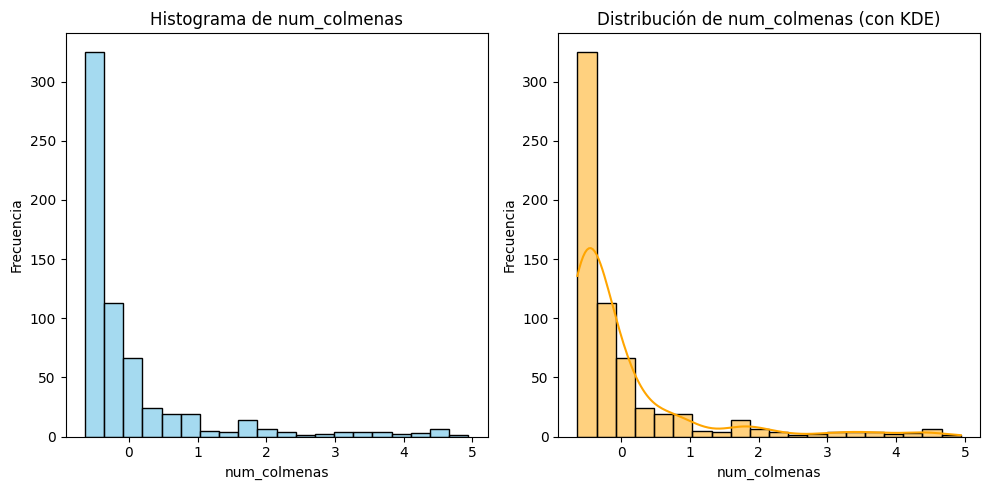

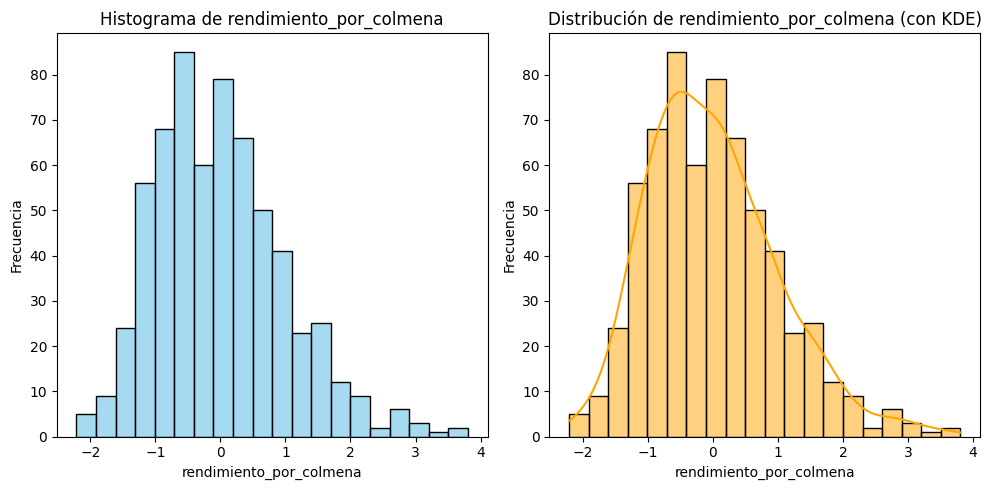

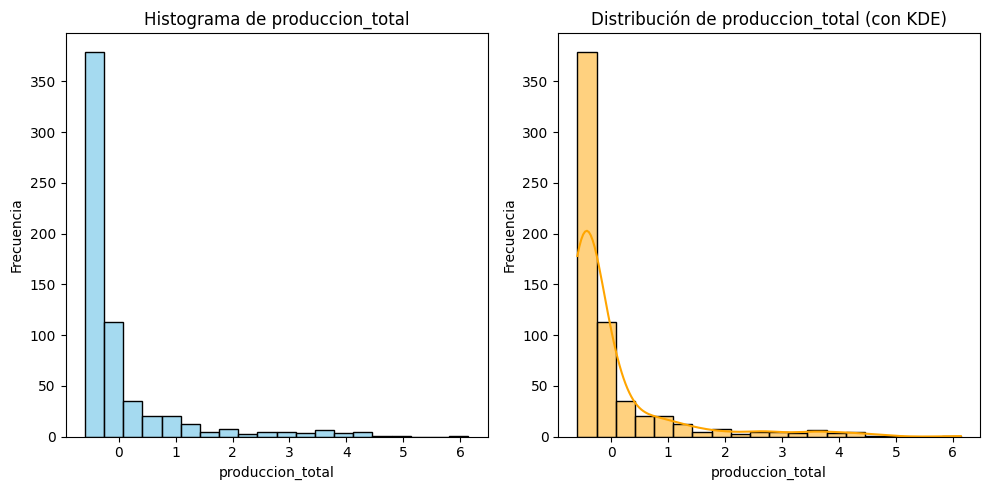

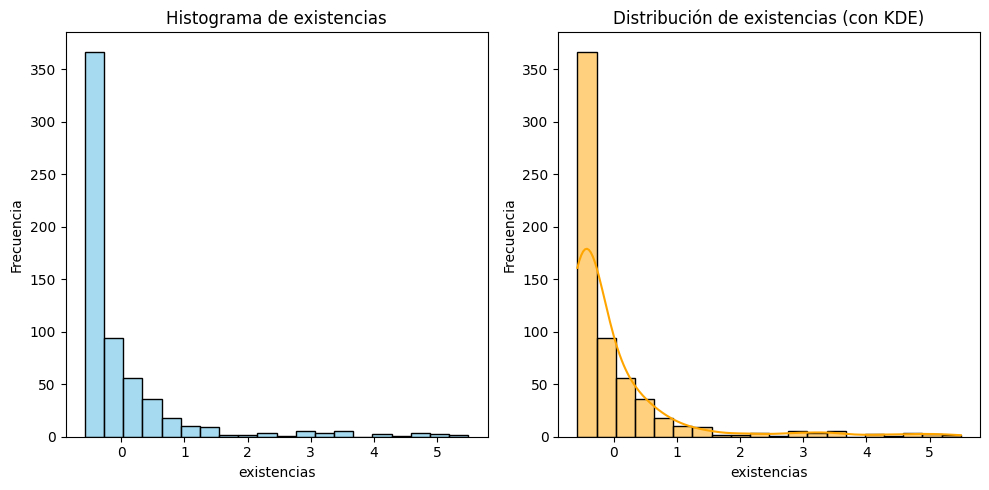

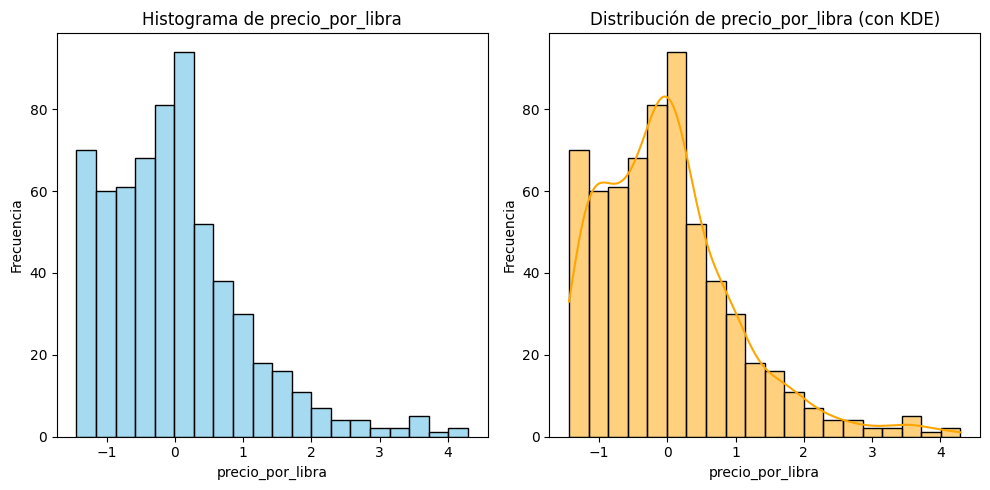

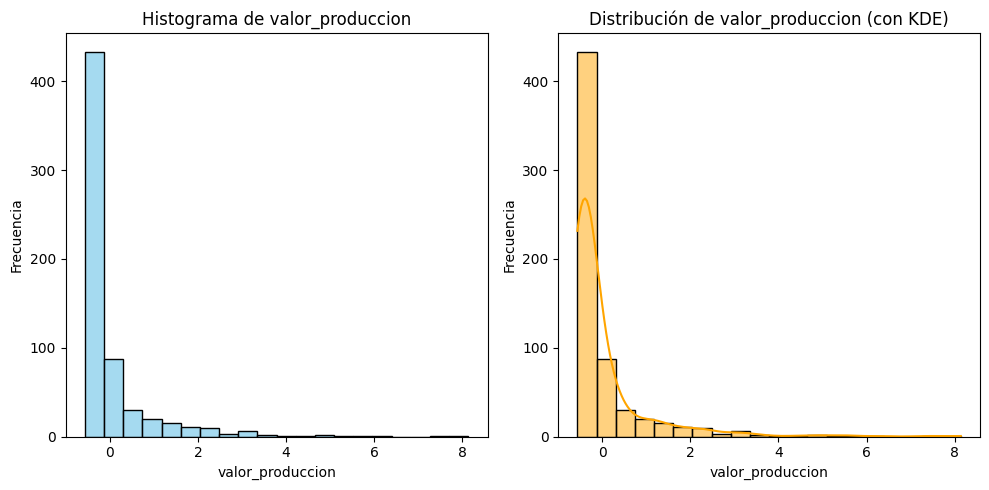

In [275]:
# Lista de variables numéricas
variables_numericas = [
    "num_colmenas", 
    "rendimiento_por_colmena", 
    "produccion_total", 
    "existencias", 
    "precio_por_libra", 
    "valor_produccion"
]

# Crear histogramas para cada variable numérica
for variable in variables_numericas:
    plt.figure(figsize=(10, 5))
    
    # Histograma básico
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=False, bins=20, color='skyblue')
    plt.title(f"Histograma de {variable}")
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    
    # Histograma con KDE
    plt.subplot(1, 2, 2)
    sns.histplot(df[variable], kde=True, bins=20, color='orange')
    plt.title(f"Distribución de {variable} (con KDE)")
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    
    plt.tight_layout()
    plt.show()


2. **Visualización Bivariada**  
   - **Scatter plots**: Crear gráficos de dispersión con `plt.scatter()` o `sns.scatterplot()` para analizar la relación entre dos variables. Por ejemplo, "producción_total" vs. "num_colmenas".  
   - **Matriz de correlación**: Calcular la matriz de correlación con `df.corr()` y visualizarla con `sns.heatmap()`. Agregar anotaciones para mostrar los valores numéricos.  

### 1. **Scatter plots**  

In [276]:
# Variables de ejemplo para scatter plots
pares_variables = [
    ("num_colmenas", "produccion_total"),
    ("rendimiento_por_colmena", "produccion_total"),
    ("existencias", "valor_produccion"),
]

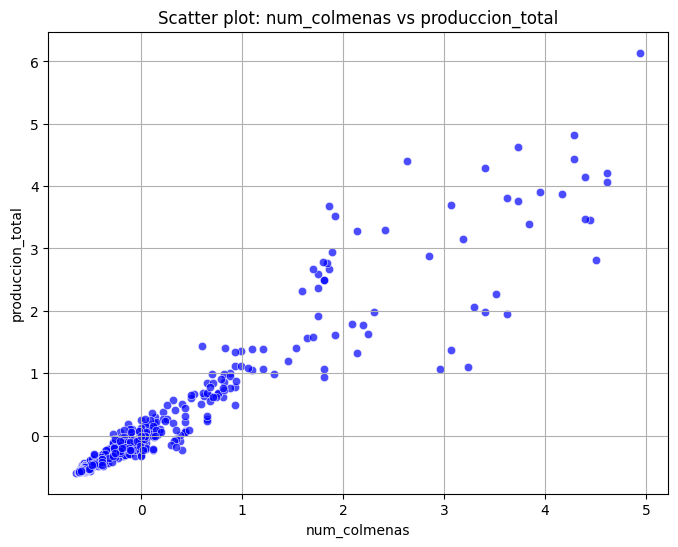

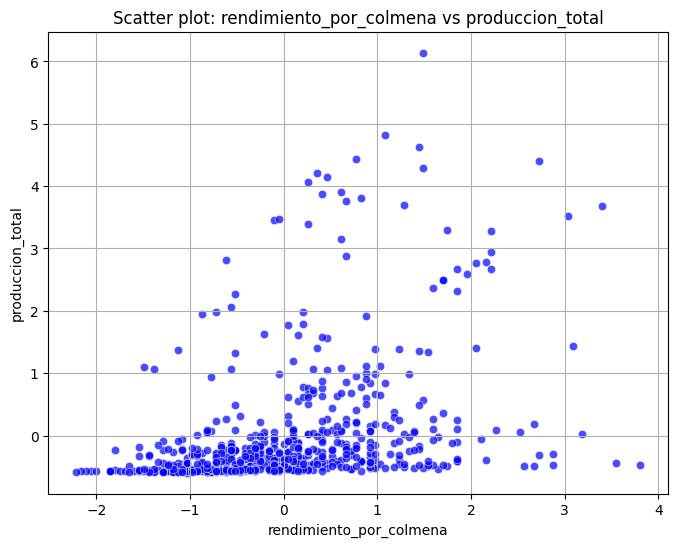

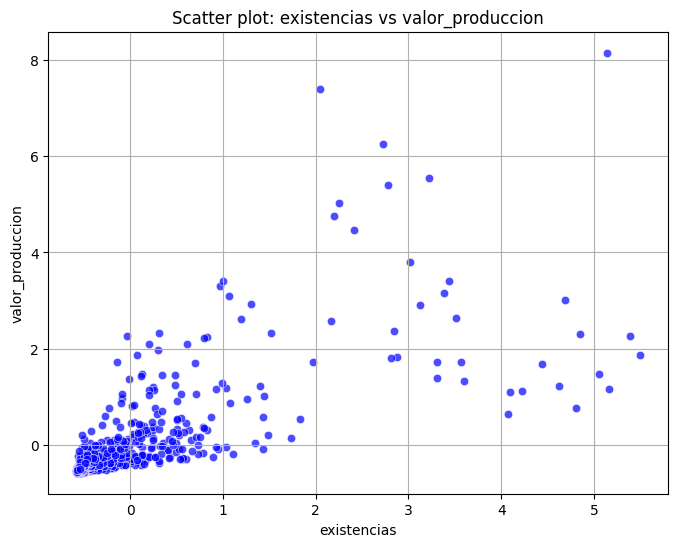

In [277]:
# Crear scatter plots para cada par de variables
for x_var, y_var in pares_variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[x_var], y=df[y_var], color='blue', alpha=0.7)
    plt.title(f"Scatter plot: {x_var} vs {y_var}")
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.grid(True)
    plt.show()

### 2. **Matriz de correlación**

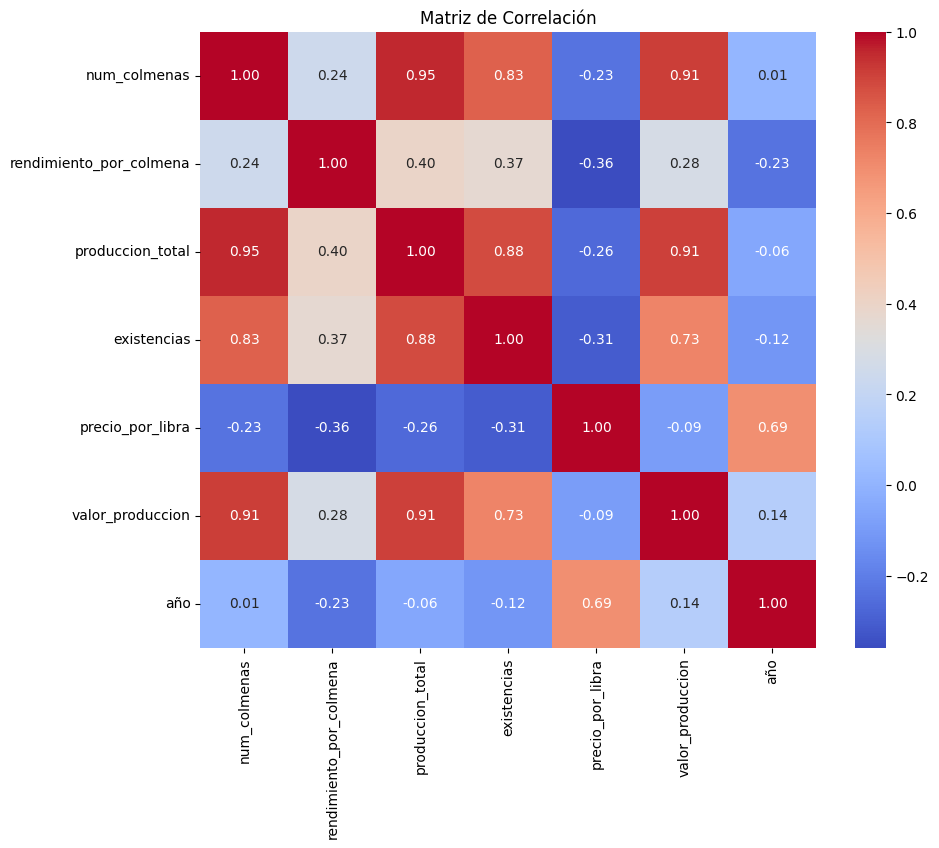

In [278]:
# Seleccionar únicamente las columnas numéricas
df_numerico = df.select_dtypes(include=["float64", "int64"])

# Calcular la matriz de correlación
correlacion = df_numerico.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Matriz de Correlación")
plt.show()

### Descripción:
1. **Scatter plots**:
   - Los gráficos muestran la relación entre pares de variables, identificando tendencias (positiva, negativa o nula) y posibles valores atípicos.

2. **Matriz de correlación**:
   - Calcula la fuerza y dirección de la relación entre variables numéricas.
   - El mapa de calor visualiza correlaciones fuertes (positivas o negativas) con colores intensos, facilitando la identificación de patrones clave.

**Nota**: Si alguna variable tiene valores atípicos extremos, puede ser útil hacer un preprocesamiento o normalización antes del análisis.

3. **Detección de valores atípicos**  
   - **Boxplots**: Utilizar `sns.boxplot()` para identificar valores atípicos en variables como "producción_total" y "precio_por_libra".  
   - **Análisis de distribuciones**: Comparar las distribuciones de las variables afectadas por valores extremos para evaluar su impacto.  

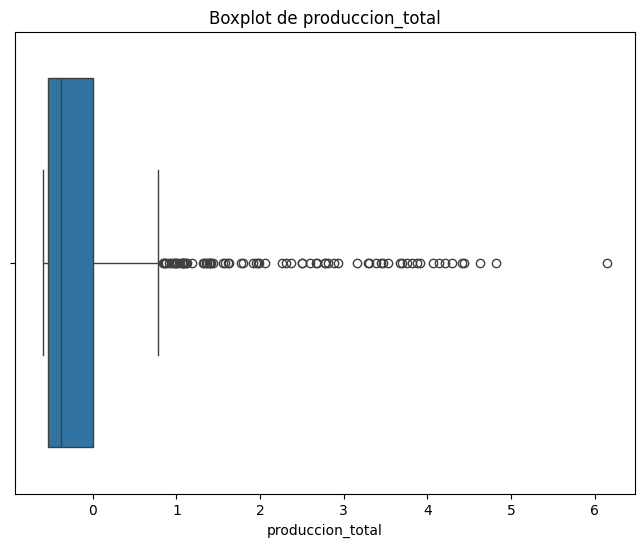

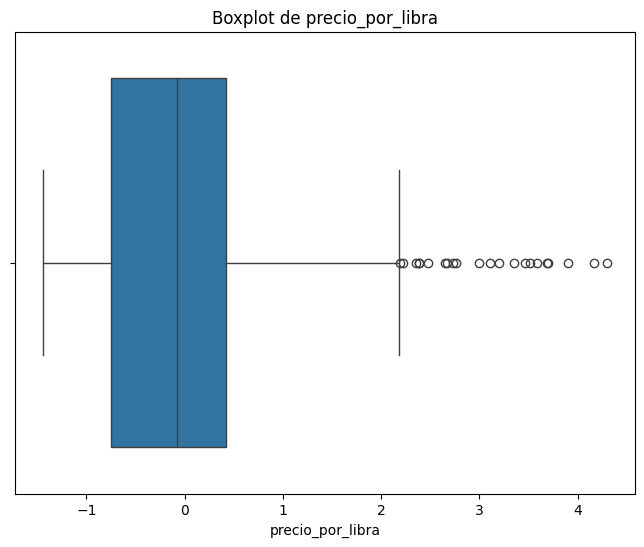

In [279]:
# Lista de variables a analizar
variables = ["produccion_total", "precio_por_libra"]

# Crear boxplots para detectar valores atípicos
for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[variable])
    plt.title(f"Boxplot de {variable}")
    plt.xlabel(variable)
    plt.show()



4. **Tendencias en el tiempo**  
   - **Gráficos de líneas**: Crear gráficos de líneas con `plt.plot()` o `sns.lineplot()` para observar tendencias a lo largo de los años en variables como "precio_por_libra" o "valor_produccion".  
   - **Análisis temporal detallado**: Usar agrupaciones por año para calcular promedios o totales y visualizar los resultados.

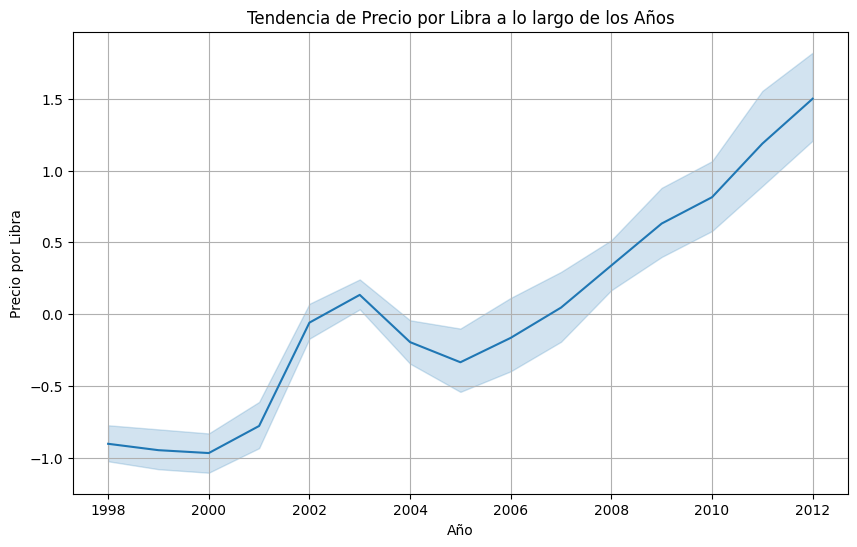

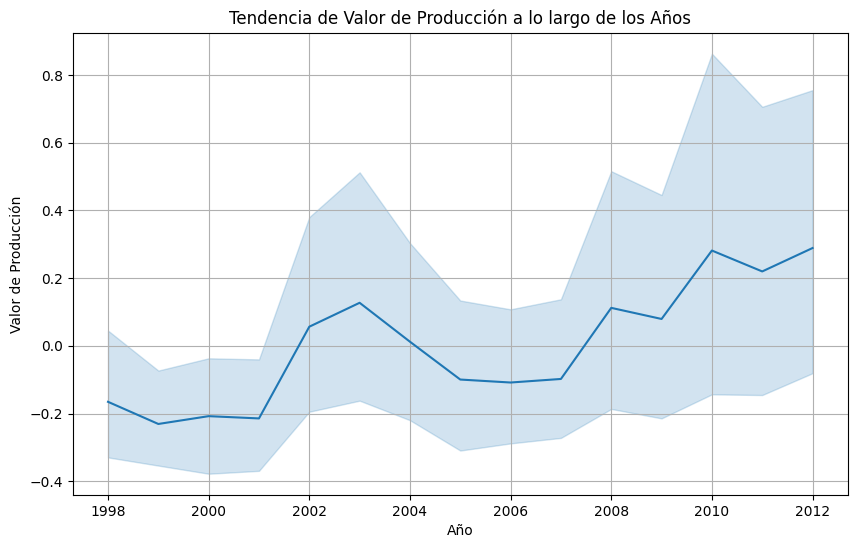

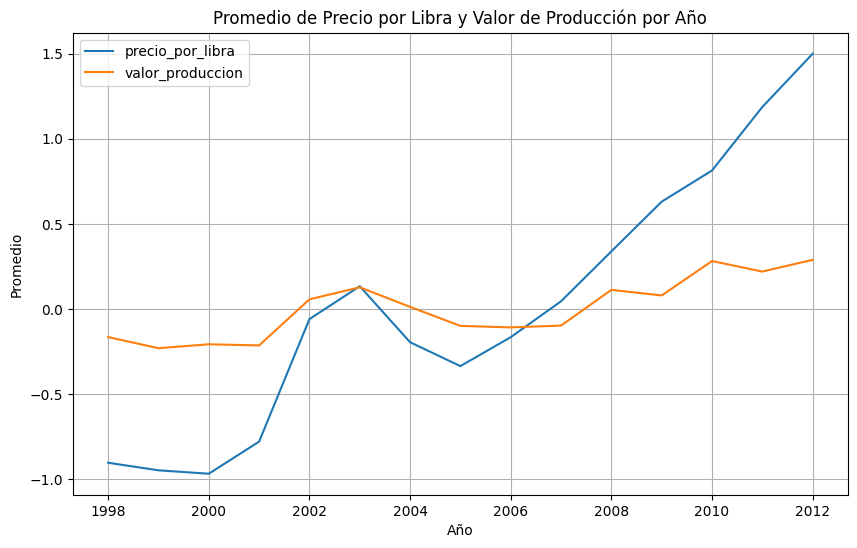

In [280]:
# Gráfico de líneas para 'precio_por_libra' a lo largo de los años
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='año', y='precio_por_libra')
plt.title('Tendencia de Precio por Libra a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Precio por Libra')
plt.grid(True)
plt.show()

# Gráfico de líneas para 'valor_produccion' a lo largo de los años
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='año', y='valor_produccion')
plt.title('Tendencia de Valor de Producción a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Valor de Producción')
plt.grid(True)
plt.show()

# Análisis temporal detallado: Agrupación por año para calcular promedios
df_grouped = df.groupby('año')[['precio_por_libra', 'valor_produccion']].mean()

# Visualizar el análisis agrupado
df_grouped.plot(figsize=(10, 6))
plt.title('Promedio de Precio por Libra y Valor de Producción por Año')
plt.xlabel('Año')
plt.ylabel('Promedio')
plt.grid(True)
plt.show()

### 5. Ingeniería de Características

#### **Creación de nuevas variables:**
En este caso, puedes crear nuevas características que sean relevantes para tu modelo. Por ejemplo, una variable que calcule la **producción por colmena** dividiendo `produccion_total` entre `num_colmenas`.

In [281]:
# Crear una nueva variable: Producción por colmena
df['produccion_por_colmena'] = df['produccion_total'] / df['num_colmenas']

#### **Transformaciones de datos:**
Puedes aplicar otras transformaciones de datos que puedan mejorar el rendimiento de tu modelo, dependiendo de las relaciones entre las variables. Por ejemplo, puedes aplicar una transformación logarítmica para reducir la asimetría en la distribución de algunas variables, como `produccion_total` y `valor_produccion`.

In [282]:
# Transformación logarítmica en producción total y valor de producción
df['log_produccion_total'] = np.log1p(df['produccion_total'])  # log(1+x) para evitar valores negativos
df['log_valor_produccion'] = np.log1p(df['valor_produccion'])

#### **Categorización de productores según el número de colmenas (uso de cuartiles):**
Puedes categorizar a los productores en diferentes grupos según el número de colmenas utilizando **cuartiles**. Esto puede ayudar a clasificar los datos en categorías que puedan tener significados útiles para la regresión.

In [283]:
# Usar cuartiles para categorizar los productores según el número de colmenas
q1 = df['num_colmenas'].quantile(0.25)
q2 = df['num_colmenas'].quantile(0.50)
q3 = df['num_colmenas'].quantile(0.75)

# Crear una nueva columna de categorías según los cuartiles
def categorize_colmenas(num_colmenas):
    if num_colmenas <= q1:
        return 'Bajo'
    elif num_colmenas <= q2:
        return 'Medio'
    elif num_colmenas <= q3:
        return 'Alto'
    else:
        return 'Muy Alto'

df['categoria_colmenas'] = df['num_colmenas'].apply(categorize_colmenas)

En este caso, la variable `categoria_colmenas` tendrá categorías como **Bajo**, **Medio**, **Alto** y **Muy Alto** en función del número de colmenas de cada productor.

### Resumen del proceso:
1. **Creación de nuevas variables**:
   - Ejemplo: `produccion_por_colmena = produccion_total / num_colmenas`
   
2. **Transformaciones de datos**:
   - Puedes aplicar transformaciones logarítmicas a las variables que tengan distribuciones sesgadas (como `produccion_total`).
   
3. **Categorización**:
   - Usar cuartiles para dividir las observaciones en categorías y generar una nueva columna categórica.

In [284]:
df.head()

,estado,num_colmenas,rendimiento_por_colmena,produccion_total,existencias,precio_por_libra,valor_produccion,año,produccion_por_colmena,log_produccion_total,log_valor_produccion,categoria_colmenas
0,AL,-0.486618,0.462394,-0.440962,-0.510693,-1.080678,-0.489068,1998,0.906176,-0.581537,-0.671518,Medio
1,AZ,-0.058067,-0.103357,-0.126351,0.073153,-1.206053,-0.326704,1998,2.175954,-0.135077,-0.395570,Alto
2,AR,-0.080044,0.153803,-0.105270,0.162535,-1.284412,-0.336616,1998,1.315157,-0.111234,-0.410401,Alto
3,CA,4.282387,1.079576,4.823967,4.846511,-1.237396,2.313911,1998,1.126467,1.761982,1.198129,Muy Alto
4,CO,-0.365745,0.513826,-0.323491,0.121146,-1.112022,-0.420935,1998,0.884473,-0.390810,-0.546341,Alto


### 6. Preparación de Datos para el Modelo de Regresión

#### **1. Selección de características:**
Debes elegir las variables que usarás como características para predecir el objetivo. Por ejemplo, si quieres predecir el `valor_produccion`, puedes usar las variables numéricas que has transformado y creado.

In [285]:
# Selección de características (features) y variable objetivo (target)
X = df[['num_colmenas', 'rendimiento_por_colmena', 'produccion_por_colmena', 
        'log_produccion_total', 'log_valor_produccion', 'precio_por_libra']]  # Características
y = df['valor_produccion']  # Variable objetivo

#### **2. Codificación de variables categóricas:**
Si tienes variables categóricas como `categoria_colmenas`, debes convertirlas en variables numéricas. Puedes usar **One-Hot Encoding** o **Label Encoding**. Aquí usaré **Label Encoding** por simplicidad.

In [286]:
# Codificar la variable categórica 'categoria_colmenas'
label_encoder = LabelEncoder()
df['categoria_colmenas_encoded'] = label_encoder.fit_transform(df['categoria_colmenas'])
# Codificar la variable categórica 'categoria_colmenas'
label_encoder = LabelEncoder()
df['categoria_colmenas_encoded'] = label_encoder.fit_transform(df['categoria_colmenas'])

#### **3. División de datos en entrenamiento y prueba:**
Para entrenar y evaluar el modelo, debes dividir tus datos en conjuntos de entrenamiento y prueba. Esto lo puedes hacer con la función `train_test_split` de `sklearn`.

In [287]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [288]:
# Eliminar las filas con NaN
# df.dropna(subset=['produccion_por_colmena'], inplace=True)

In [289]:
# Verificar NaN en X_train y y_train
print(X_train.isnull().sum())
print(y_train.isnull().sum())

num_colmenas               0
rendimiento_por_colmena    0
produccion_por_colmena     0
log_produccion_total       0
log_valor_produccion       0
precio_por_libra           0
dtype: int64
0


#### **4. Regresión Lineal:**
Ahora, puedes entrenar el modelo de regresión lineal utilizando `LinearRegression` de `sklearn`.

In [290]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [291]:
# Predecir con los datos de prueba
y_pred = model.predict(X_test)

#### **5. Evaluación del modelo:**
Después de entrenar el modelo, puedes evaluar su rendimiento utilizando métricas como el **Error Cuadrático Medio (MSE)** y el **R2 Score**.

In [292]:
# Calcular el MSE y R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'R2 Score: {r2}')

Error Cuadrático Medio (MSE): 0.08512460194177794
R2 Score: 0.9160996182497879


### Resumen:

1. **Seleccionar las características** relevantes para la regresión.
2. **Codificar las variables categóricas** si las hay.
3. **Dividir los datos** en entrenamiento y prueba.
4. **Entrenar el modelo** de regresión lineal con los datos de entrenamiento.
5. **Evaluar el rendimiento** del modelo con métricas adecuadas (MSE, R2 Score).

### Código para hacer predicciones:

In [299]:
# Supongo que ya tengo el modelo entrenado (model)

# Creo un DataFrame con los nuevos datos para predecir
# Me aseguro de que las columnas de los datos nuevos coincidan con las de mi conjunto de entrenamiento (X_train)
nuevos_datos = pd.DataFrame({
    'num_colmenas': [100000],  # Ejemplo de valor
    'rendimiento_por_colmena': [50],  # Ejemplo de valor
    'produccion_por_colmena': [0.75],  # Ejemplo de valor
    'log_produccion_total': [12.5],  # Ejemplo de valor
    'log_valor_produccion': [13.5],  # Ejemplo de valor
    'precio_por_libra': [1.2]  # Ejemplo de valor
})

# Realizo la predicción
predicciones = model.predict(nuevos_datos)

# Veo las predicciones, redondeando a dos decimales
print(f"Predicción para el 'valor_produccion': {round(predicciones[0], 2)}")

Predicción para el 'valor_produccion': 85157.72


`La predicción de valor_producción de 85,157.72 se obtuvo utilizando el modelo de regresión lineal entrenado con los datos históricos. Este valor indica la estimación de la producción total de valor para un conjunto de datos dado, considerando las características de la colmena como el número de colmenas, el rendimiento por colmena, y el precio por libra. La predicción refleja cómo se espera que evolucione el valor de producción en función de las variables de entrada proporcionadas.`